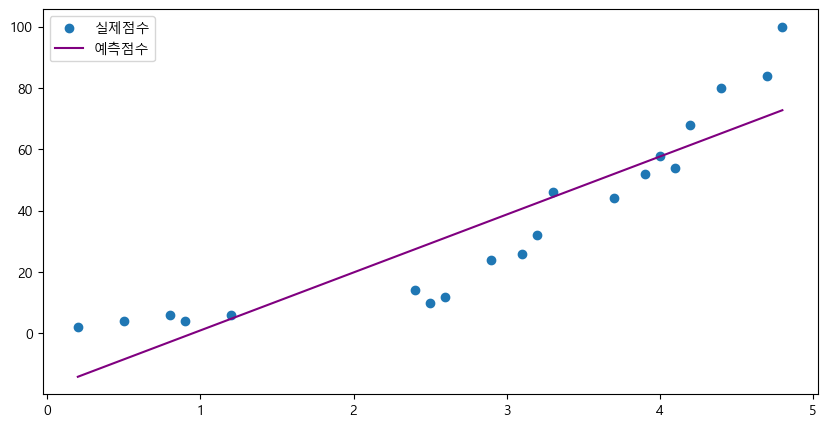

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font',family="Malgun Gothic")
plt.rc('axes',unicode_minus=False)

dataset=pd.read_csv('data/PolynomialRegressionData.csv')
# dataset.head()

X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X,y)
reg.score(X,y)

#___________________시각화(산점도, 단순선형회귀)
plt.figure(figsize=(10,5))
plt.scatter(X,y, label='실제점수')
plt.plot(X,reg.predict(X), label='예측점수', color='purple')
plt.legend()
plt.show()


In [92]:
from sklearn.preprocessing import PolynomialFeatures #다항으로 만들어 주는 패키지
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X)
X_poly[:5], X[:5]
#(array([[1.  , 0.2 , 0.04], 1의 0.2승 시 0.2, 0.2의 0.2승 시 0.04...
#        [1.  , 0.5 , 0.25],
#        [1.  , 0.8 , 0.64],
#        [1.  , 0.9 , 0.81],
#        [1.  , 1.2 , 1.44]]),

(array([[1.  , 0.2 , 0.04],
        [1.  , 0.5 , 0.25],
        [1.  , 0.8 , 0.64],
        [1.  , 0.9 , 0.81],
        [1.  , 1.2 , 1.44]]),
 array([[0.2],
        [0.5],
        [0.8],
        [0.9],
        [1.2]]))

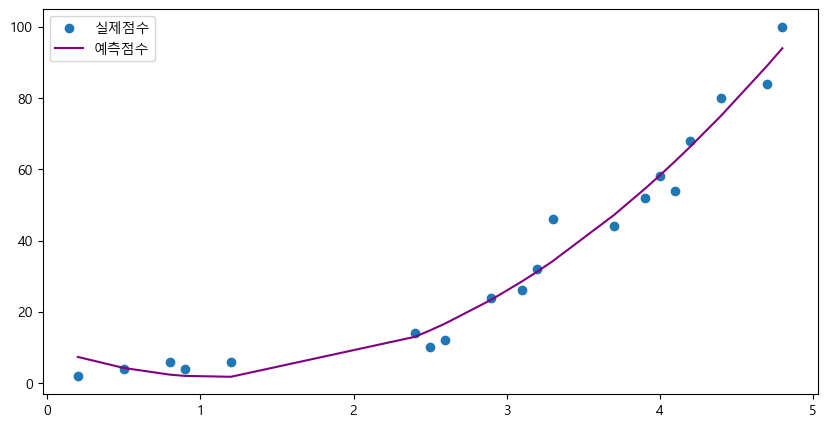

In [93]:
poly_reg=LinearRegression()
poly_reg.fit(X_poly,y)

#____________________________________________시각화
plt.figure(figsize=(10,5))
plt.scatter(X,y, label='실제점수')
plt.plot(X,poly_reg.predict(X_poly), label='예측점수', color='purple')
plt.legend()
plt.show()

In [94]:
import numpy as np
X_range=np.arange(np.min(X), np.max(X), 0.1)# 값은 동일max(X), np.max(X)
X.shape, X_range.shape

X_range=X_range.reshape(len(X_range),1) #20행 1열을 46행으로 변경하기(So 1이 나옴 열에)
X_poly=poly.fit_transform(X_range)
X_poly[:5]


array([[1.  , 0.2 , 0.04],
       [1.  , 0.3 , 0.09],
       [1.  , 0.4 , 0.16],
       [1.  , 0.5 , 0.25],
       [1.  , 0.6 , 0.36]])

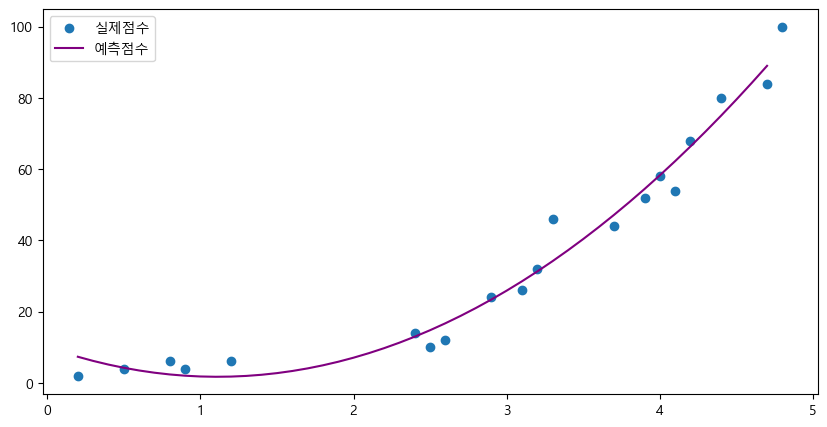

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [95]:
#____________________________________________시각화
plt.figure(figsize=(10,5))
plt.scatter(X,y, label='실제점수')
plt.plot(X_range,poly_reg.predict(X_poly), label='예측점수', color='purple') #X값을 X_range로 대체함
plt.legend()
plt.show()

poly_reg

In [96]:
def model_poly(degree): #분석해주는 모델
    import pandas as pd

    dataset=pd.read_csv('data/PolynomialRegressionData.csv')
    X=dataset.iloc[:,:-1].values
    y=dataset.iloc[:,-1].values

    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree=degree) #poly여도 모델 생성은 LinearRegression
    X_poly=poly.fit_transform(X)

    from sklearn.linear_model import LinearRegression
    poly_reg=LinearRegression()
    poly_reg.fit(X_poly,y)
    return poly_reg

model=model_poly(2)


In [97]:
dataset=pd.read_csv('data/PolynomialRegressionData.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2) #poly여도 모델 생성은 LinearRegression
X_poly=poly.fit_transform(X)

X_poly


array([[ 1.  ,  0.2 ,  0.04],
       [ 1.  ,  0.5 ,  0.25],
       [ 1.  ,  0.8 ,  0.64],
       [ 1.  ,  0.9 ,  0.81],
       [ 1.  ,  1.2 ,  1.44],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  2.5 ,  6.25],
       [ 1.  ,  2.6 ,  6.76],
       [ 1.  ,  2.9 ,  8.41],
       [ 1.  ,  3.1 ,  9.61],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.3 , 10.89],
       [ 1.  ,  3.7 , 13.69],
       [ 1.  ,  3.9 , 15.21],
       [ 1.  ,  4.  , 16.  ],
       [ 1.  ,  4.1 , 16.81],
       [ 1.  ,  4.2 , 17.64],
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  4.7 , 22.09],
       [ 1.  ,  4.8 , 23.04]])

In [98]:
model=model_poly(2)

In [99]:
#4시간 공부했을 때 점수

x=poly.fit_transform([[5]])
model.predict(x)


array([104.2391999])

In [100]:
reg.predict([[5]])

array([76.56559375])

In [101]:
def graph(degree): 
    model=model_poly(degree)

    X_range = np.arange(np.min(X), np.max(X), 0.1)
    X_range = X_range.reshape(len(X_range), 1)

    from sklearn.preprocessing import PolynomialFeatures
    poly=PolynomialFeatures(degree=degree)
    X_poly=poly.fit_transform(X_range)

    plt.figure(figsize=(5,3))
    plt.scatter(X, y, label='실제점수')
    plt.plot(X_range, model.predict(X_poly), label='예측점수', color='red')
    plt.show()




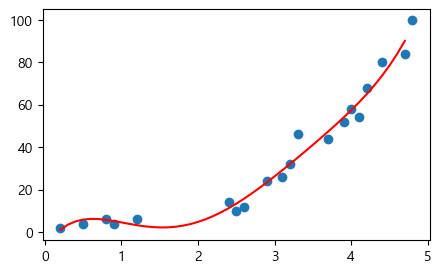

In [102]:
graph(5)

In [103]:
def predict(hour): #입력시간을 받아서 예상점수를 출력
    model=model_poly(2)

    from sklearn.preprocessing import PolynomialFeatures
    poly=PolynomialFeatures(degree=2)
    poly_hour=poly.fit_transform([[hour]])

    pred=model.predict(poly_hour)
    print(f'다항회귀: {hour}시간 공부했을 경우, 점수는 약 {pred[0]:.2f}입니다.')

    reg=LinearRegression()
    reg.fit(X,y)
    pred=reg.predict([[hour]])
    print(f'선형회귀: {hour}시간 공부했을 경우, 점수는 약 {pred[0]:.2f}입니다.')



In [104]:
predict(4.5)

다항회귀: 4.5시간 공부했을 경우, 점수는 약 79.57입니다.
선형회귀: 4.5시간 공부했을 경우, 점수는 약 67.11입니다.


In [105]:
reg.score(X,y), poly_reg.score(poly.transform(X),y)

(0.8169296513411765, 0.9755457185555199)

In [106]:
import pandas as pd
df=pd.read_csv('data/다항회귀.csv')
df
X=df.iloc[:,1:].values
X.shape

(6, 1)

In [107]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X)
X_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  5.  , 25.  ],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  1.8 ,  3.24],
       [ 1.  ,  4.  , 16.  ],
       [ 1.  ,  2.8 ,  7.84]])

In [108]:
model=model_poly(2)
y_pred=model.predict(X_poly)
y_pred

array([  7.05092142, 104.2391999 ,  40.38980529,   4.9109755 ,
        58.28288008,  21.03479593])

In [110]:
df['예측점수']=y_pred
df['예측점수']=df['예측점수'].apply(lambda x:round(x,2))
df.rename(columns={'name':'이름','hour':'공부시간'}, inplace=True)
df

,이름,공부시간,예측점수
0,홍길동,2.0,7.05
1,강감찬,5.0,104.24
2,이순신,3.5,40.39
3,이몽룡,1.8,4.91
4,성춘향,4.0,58.28
5,송중기,2.8,21.03
